<a href="https://colab.research.google.com/github/Jerrybin30731/Jerrybin30731/blob/main/%E3%80%8Cfivethirtyeight_(1)_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 閱讀和瀏覽您的數據
在本實驗中，我們將探索一個資料集，其中包含每個系的大學應屆畢業生訊息。可以從recent_grads.csv數據集中提取，並儲存在名為recent_grads的變數中。在本練習中，使用Python的pandas模組讀取此數據。

In [3]:
import pandas as pd # 引入pandas模組並將其名稱改為pd方便取用。

recent_grads = pd.read_csv("recent_grads.csv") # 建立變數讀取檔案，變數名稱自定義為recent_grads，使用pd.read讀取recent_grads.csv檔。
print(recent_grads.shape) # 打印出recent_grads.csv的維度，使用shape獲取文件的維度(行數, 列數)(二維)

(173, 21)


### 瀏覽資料
現在，使用Python pandas模組執行一些資料探索。為了理解資料，我們將輸出統計數據，例如平均值，中位數，計數和百分位數。


In [9]:
print(recent_grads.dtypes) # 打印出每一列的數據類型
print('---------------')
print(recent_grads.describe()) # 計算列的計數、平均值、標準差、最小值、25% 分位數、中位數(50% )、75% 分位數和最大值
print('---------------')
print(recent_grads.describe(exclude=['object'])) # 計算列的計數、平均值、標準差、最小值、25% 分位數、中位數(50%) 分位數、75% 分位數和最大值，排除object類型，只獲取數字類型

Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object
---------------
             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474 

### 替換遺失值
數據集中有些遺失值被編碼為字串"UN"。將這些更新為Python理解為“遺失”的值。

該列表columns包含您將在本練習中使用的行的名稱。

In [18]:
import numpy as np # 引入numpy模組並將其名稱改為np方便取用。

columns = ['Median', 'P25th', 'P75th'] # 建立變數獲取特定columns，變數名稱自定義為columns，使用pd.read讀取recent_grads.csv檔。

print(recent_grads[columns].dtypes) # 打印出columns的資料型態

print('----------------------')

print(sorted(recent_grads["Median"].unique())) # 使用.unique()獲取Median欄的唯一值並且使用sorted使打印出的結果由小到大排序

for column in columns:
    recent_grads.loc[recent_grads[column] == 'UN', column] = np.nan

Median    int64
P25th     int64
P75th     int64
dtype: object
----------------------
[22000, 23400, 25000, 26000, 27000, 27500, 28000, 29000, 30000, 30500, 31000, 31500, 32000, 32100, 32200, 32400, 32500, 33000, 33400, 33500, 34000, 35000, 35600, 36000, 36200, 36400, 37000, 37400, 37500, 38000, 38400, 39000, 40000, 40100, 41000, 41300, 42000, 44000, 44700, 45000, 46000, 47000, 48000, 50000, 51000, 52000, 53000, 54000, 56000, 57000, 57100, 58000, 60000, 62000, 65000, 70000, 73000, 75000, 110000]


### 選擇一列
Python的pandas模組允許我們從DataFrame中選擇特定的欄位，這在我們只需要處理一條數據時特別有用。在本練習中，選擇一sharewomen行，該行顯示指定系所中女性的百分比。

In [ ]:
sw_col = recent_grads['ShareWomen']

print(sw_col.head())

0    0.120564
1    0.101852
2    0.153037
3    0.107313
4    0.341631
Name: ShareWomen, dtype: float64


### 輸出最大值的列
現在已經選擇了該sharewomen行，使用numpy來輸出其最大值。


In [ ]:
import numpy as np

max_sw = np.max(sw_col)

print(max_sw)

0.968953683


### 選擇列
雖然我們知道某個系所中女性的最大百分比是多少，但這是哪個系所？通過pandas過濾數據集來輸出此資料。

In [ ]:
print(recent_grads[sw_col == max_sw])

     Rank  Major_code                      Major    Total     Men    Women  \
164   165        2307  EARLY CHILDHOOD EDUCATION  37589.0  1167.0  36422.0   

    Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
164      Education    0.968954          342     32551  ...       7001   

     Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th  \
164                 20748        1360           0.040105   28000  21000   

     P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
164  35000         23515              7705           2868  

[1 rows x 21 columns]


### 將DataFrame轉換為Numpy陣列
由於numpy是一個功能強大的Python模組，因此本練習要求將pandas DataFrame 轉換為numpy陣列，然後下一個練習中利用numpy可用的統計指標。

In [ ]:
recent_grads_np = recent_grads[["Unemployed","Low_wage_jobs"]].values

print(type(recent_grads_np))

<class 'numpy.ndarray'>


### 相關係數
我們可能會懷疑low_wage_jobs和unemployment_rate行之間存在關聯，因此使用numpy來計算相關係數。

In [ ]:
print(np.corrcoef(recent_grads_np[:,0],recent_grads_np[:,1]))


[[1.         0.95538815]
 [0.95538815 1.        ]]


### 創建欄位
如果查看數據集，將會注意到，雖然有一個欄位顯示每個部門中女性的百分比，但沒有一欄位顯示男性百分比。
創建一個名為的新欄位sharemen，其中將給定系所的人員百分比除以每個系所的學生總數除以人員的百分比。

In [ ]:
recent_grads['Sharemen'] = recent_grads['Men']/recent_grads['Total']
recent_grads['Sharemen']

0      0.879436
1      0.898148
2      0.846963
3      0.892687
4      0.658369
         ...   
168    0.362707
169    0.182901
170    0.200141
171    0.201254
172    0.122040
Name: Sharemen, Length: 173, dtype: float64

### 選擇具有最大值的資料
還記得我們是如何找到女性百分比最高的數據列嗎？現在，找到男性比率最高的系所相對應的列。

In [ ]:
max_men = np.max(recent_grads['Sharemen'])

print(recent_grads[recent_grads.Sharemen==max_men])

### 創建欄位
最終，若想弄清楚哪個部門在男女之間最平衡。為此，添加一個新欄位來報告男女之間的百分比差異。
添加一個名為gender_diff“女性” 的欄位，該欄報告女性的比率比男性的比率高多少。

In [ ]:
recent_grads['Gender_diff'] = recent_grads['ShareWomen']-recent_grads['Sharemen']

### 更新行

該gender_diff列的數據當前包含負值和正值，具體取決於哪一組人群（男女）的百分比更高。您想找到性別比例最平衡的五個部門，但首先，通過將gender_diff列中的值替換為其各自的絕對值來簡化生活。

In [ ]:
recent_grads['Gender_diff'] = np.abs(recent_grads['Gender_diff'])

print(recent_grads.nsmallest(5,'Gender_diff'))

     Rank  Major_code                                          Major  \
139   140        4101  PHYSICAL FITNESS PARKS RECREATION AND LEISURE   
102   103        5503                                    CRIMINOLOGY   
74     75        5003                                      CHEMISTRY   
146   147        6002                                          MUSIC   
117   118        2311    SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION   

        Total      Men    Women                       Major_category  \
139  125074.0  62181.0  62893.0  Industrial Arts & Consumer Services   
102   19879.0  10031.0   9848.0                       Social Science   
74    66530.0  32923.0  33607.0                    Physical Sciences   
146   60633.0  29909.0  30724.0                                 Arts   
117   20198.0   9950.0  10248.0                            Education   

     ShareWomen  Sample_size  Employed  ...  Unemployed  Unemployment_rate  \
139    0.502846         1014    103078  ...        5593 

### 篩選資料
最後，可以篩選出那些基準差超過0.30的部門。由於所有值現在都是正數，因此可以使用簡單的布林運算符執行此操作。

若想查找包含嚴重偏向男性的部門的資料。使用已經完成的工作，將創建一個包含此資料的新DataFrame。


In [ ]:
diff_30 = recent_grads['Gender_diff'] > .30

more_men = recent_grads['Sharemen'] > recent_grads['ShareWomen']

more_men_and_diff_30 = np.logical_and(more_men,diff_30)

fewer_women = recent_grads[more_men_and_diff_30]
fewer_women

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Sharemen,Gender_diff
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,37,0.018381,110000,95000,125000,1534,364,193,0.879436,0.758871
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,85,0.117241,75000,55000,90000,350,257,50,0.898148,0.796296
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,16,0.024096,73000,50000,105000,456,176,0,0.846963,0.693925
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,40,0.050125,70000,43000,80000,529,102,0,0.892687,0.785374
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,1672,0.061098,65000,50000,75000,18314,4440,972,0.658369,0.316739
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,400,0.177226,65000,50000,102000,1142,657,244,0.855033,0.710066
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,4650,0.057342,60000,48000,70000,52844,16384,3253,0.880441,0.760882
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,3895,0.059174,60000,45000,72000,45829,10874,3170,0.803550,0.607099
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,2275,0.065409,60000,45000,75000,23694,5721,980,0.800587,0.601175
11,12,2401,AEROSPACE ENGINEERING,15058.0,12953.0,2105.0,Engineering,0.139793,147,11391,...,794,0.065162,60000,42000,70000,8184,2425,372,0.860207,0.720414


### 計數分組
系所種類繁多，但無法確定每個類別中有多少個系所。將pandas用來深入了解此信息。

使用.groupby()具有以下三個組成部分：要分組的欄位，要聚合的欄位以及要作為聚合依據的統計資料。例如，在我們的數據，如果我們想看到女性的比例（'sharewomen'）在每個 'major_category'，我們可以充分利用.groupby像這樣：recent_grads.groupby('major_category')\['sharewomen'\].mean()。在這裡，我們按進行分組'major_category'，並按'sharewomen'平均值進行聚合。

In [ ]:
print(recent_grads.groupby(['Major_category']).Major_category.count())

Major_category
Agriculture & Natural Resources        10
Arts                                    8
Biology & Life Science                 14
Business                               13
Communications & Journalism             4
Computers & Mathematics                11
Education                              16
Engineering                            29
Health                                 12
Humanities & Liberal Arts              15
Industrial Arts & Consumer Services     7
Interdisciplinary                       1
Law & Public Policy                     5
Physical Sciences                      10
Psychology & Social Work                9
Social Science                          9
Name: Major_category, dtype: int64


按主要類別對系所進行分組，並顯示女性偏少的系所數。

In [ ]:
print(fewer_women.groupby(['Major_category']).Major_category.count())


Major_category
Agriculture & Natural Resources         5
Business                                3
Computers & Mathematics                 7
Engineering                            26
Industrial Arts & Consumer Services     4
Law & Public Policy                     1
Physical Sciences                       2
Name: Major_category, dtype: int64


### 用平均值分組
與剛剛完成的練習類似，可以對行進行分組以在列中輸出不同分組的平均值。
按主要類別輸出平均性別百分比差異。

In [ ]:
print(recent_grads.groupby('Major_category').Gender_diff.mean())

Major_category
Agriculture & Natural Resources        0.403082
Arts                                   0.290622
Biology & Life Science                 0.174386
Business                               0.227085
Communications & Journalism            0.316768
Computers & Mathematics                0.386083
Education                              0.510869
Engineering                            0.522223
Health                                 0.590304
Humanities & Liberal Arts              0.349195
Industrial Arts & Consumer Services    0.585843
Interdisciplinary                      0.541802
Law & Public Policy                    0.217270
Physical Sciences                      0.237020
Psychology & Social Work               0.588794
Social Science                         0.232504
Name: Gender_diff, dtype: float64


輸出'low_wage_jobs'和'unemployment_rate' 的平均，用'major_category'來分組

In [ ]:
dept_stats = recent_grads.groupby(['Major_category'])['Low_wage_jobs', 'Unemployment_rate'].mean()
print(dept_stats)

                                     Low_wage_jobs  Unemployment_rate
Major_category                                                       
Agriculture & Natural Resources         789.900000           0.056328
Arts                                   7514.500000           0.090173
Biology & Life Science                 3053.000000           0.060918
Business                               9752.923077           0.071064
Communications & Journalism           12398.750000           0.075538
Computers & Mathematics                1466.909091           0.084256
Education                              2554.375000           0.051702
Engineering                             864.793103           0.063334
Health                                 2605.833333           0.065920
Humanities & Liberal Arts              6282.666667           0.081008
Industrial Arts & Consumer Services    3798.571429           0.048071
Interdisciplinary                      1061.000000           0.070861
Law & Public Policy 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


### 繪製散點圖
現在計算low_wage_jobs和unemployment_rate欄位之間的相關係數，現在想要創建一個可視化文件以有效顯示此關係。將用於matplotlib創建這兩欄位的散點圖。


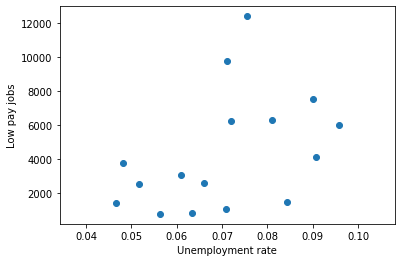

In [ ]:
#Plotting Scatterplots
# Import matplotlib
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(dept_stats.Unemployment_rate,dept_stats.Low_wage_jobs)

# Label x axis
plt.xlabel('Unemployment rate')

# Label y axis
plt.ylabel('Low pay jobs')

# Display the graph
plt.show()

### 修改繪圖顏色
的預設設置matplotlib可能不是您希望提供給其他人的預設設置，因此針對低工資與失業率進行自定義設置

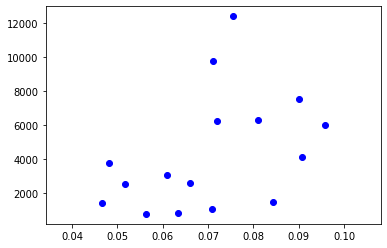

In [ ]:
#Modifying Plot Colors

# Plot the red and triangle shaped scatter plot
plt.scatter(dept_stats.Unemployment_rate,dept_stats.Low_wage_jobs,color='b',marker='o')

# Display the visualization
plt.show()

### 繪製直方圖
已經查看了該散點圖，現在想回到sharewomen先前使用的欄位。具體來說，想了解的值如何sharewomen分佈。這意味著要繪製直方圖。為方便起見，該sharewomen欄位已從recent_gradsDataFrame中提取到名為的變數中sharewomen。

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


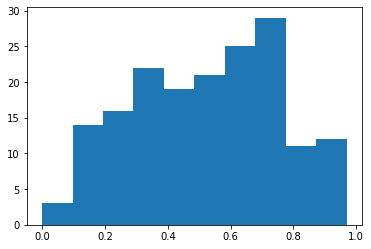

In [ ]:
#Plotting Histograms

# Plot a histogram of sharewomen
plt.hist(recent_grads.ShareWomen)

# Show the plot
plt.show()

### 用Pandas繪圖
在Python中，有幾種不同的方式來創建可視化。實際上，pandas它具有自己的可視化功能，所有這些功能都建立在matplotlib的基礎上。例如，您可以使用recent_grads.sharewomen(kind="hist")代替來創建上一個練習的直方圖plt.hist(recent_grads.sharewomen)。

喜歡哪種方法取決於個人喜好-使用DataFrames時，使用pandas'繪圖功能是有利的，因為程式往往不太冗長。

在這裡，練習使用pandas代替從先前的練習中創建繪圖matplotlib。所有pandas圖都是使用.plot()於DataFrame上的方法創建的。在內部.plot()，您可以使用kind參數指定要創建的繪圖。例如，kind= 'hist'將創建直方圖，kind='scatter'將創建散點圖，依此類推。

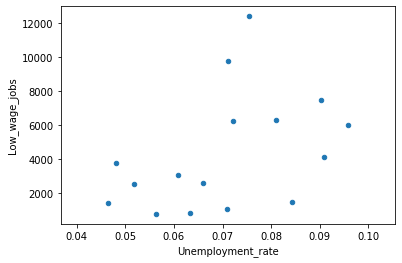

In [ ]:
#Plotting with pandas

# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot
dept_stats.plot(kind='scatter', x='Unemployment_rate', y='Low_wage_jobs')
plt.show()

### 繪製一個長條圖
接下來，確定每個主要類別中有多少學生在沒有需要學位的工作的情況下畢業，因此我們決定在非大學工作數量和每個主要類別之間創建長條圖。

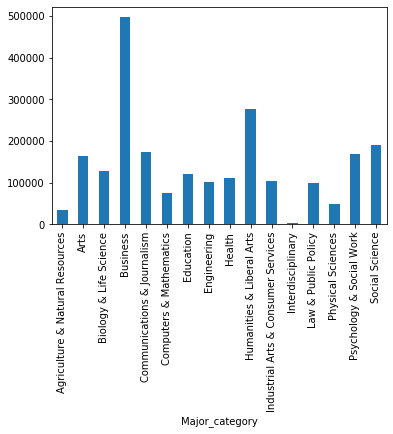

In [ ]:
#Plotting One Bar Graphs

# DataFrame of non-college job sums
df = recent_grads.groupby(['Major_category']).Non_college_jobs.sum()

# Plot bar chart
df.plot(kind = 'bar')

# Show graph
plt.show()

### 繪製兩個長條圖
上一個可視化效果為我們提供了一張很好的圖片，顯示有多少學生在從事不需要大學學位的工作，但是卻無法使我們了解每個類別相對於彼此的表現。因此，您決定將college_jobs列添加為額外的信息，以便可以評估兩者之間的差異。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


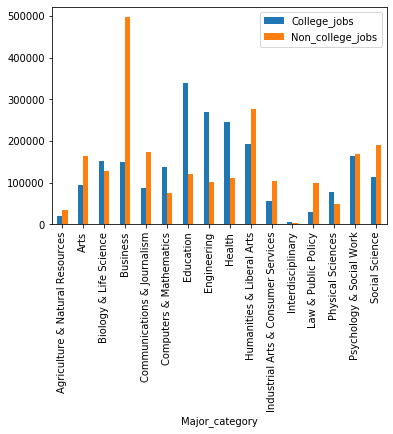

In [ ]:
# DataFrame of college and non-college job sums
df1 = recent_grads.groupby(['Major_category'])['College_jobs','Non_college_jobs'].sum()

# Plot bar chart
df1.plot(kind='bar')

# Show graph
plt.show()

### 刪除缺失值
現在，您已經用UN值替換了值NaN，我們意識到最好完全刪除這些行。在本練習中，執行此操作。為了確認我們過濾掉了行，然後檢查DataFrame的大小。

In [ ]:
# Print the size of the DataFrame
print(recent_grads.size)

# Drop all rows with a missing value
recent_grads.dropna(axis=0,inplace=True)

# Print the size of the DataFrame
print(recent_grads.size)

3979
3956


### 繪製薪資分位數
現在，在主要類別上繪製一些不同的平均薪資分位數，以便可以比較不同的薪資分配。在本練習中，準備matplotlib數據。

In [ ]:
# Convert to numeric and divide by 1000
recent_grads['Median'] = pd.to_numeric(recent_grads['Median'])/1000
recent_grads['P25th'] = pd.to_numeric(recent_grads['P25th'])/1000
recent_grads['P75th'] = pd.to_numeric(recent_grads['P75th'])/1000

# Select averages by major category
columns = ['Median', 'P25th', 'P75th']
sal_quantiles = recent_grads.groupby(['Major_category'])[columns].mean()

### 繪製薪資分位數

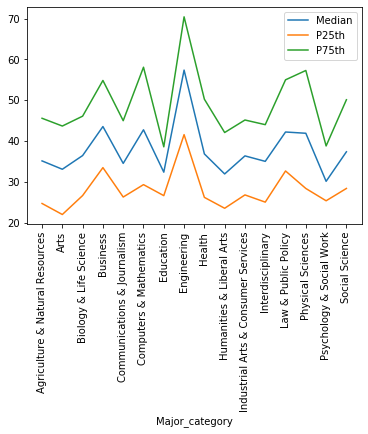

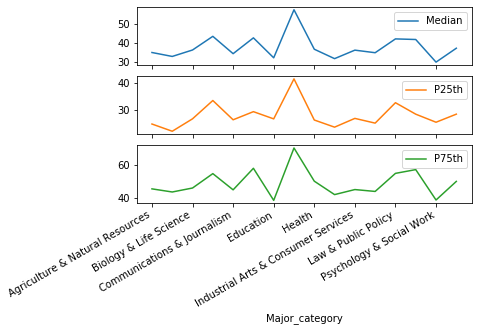

In [ ]:
sal_quantiles.plot()

plt.xticks(np.arange(len(sal_quantiles.index)),sal_quantiles.index, rotation='vertical')

plt.show()

sal_quantiles.plot(subplots=True)
plt.show()